## **Introdução**  

A precificação de imóveis é um desafio recorrente no mercado imobiliário, exigindo modelos preditivos capazes de estimar valores com base em múltiplas variáveis. Nesta atividade, exploraremos o conjunto de dados **Boston House Price**, um dataset amplamente utilizado para estudar técnicas de regressão em Ciência de Dados.  

Nosso objetivo é analisar os dados, realizar um pré-processamento adequado e testar diferentes abordagens para prever o preço das casas. A atividade seguirá um fluxo estruturado, começando com a **exploração das variáveis e análise estatística**, seguida de uma **etapa de engenharia de features**, onde investigaremos a importância das variáveis e aplicaremos possíveis transformações para melhorar a performance dos modelos.  

Em seguida, aplicaremos **múltiplas técnicas de regressão**, incluindo **Regressão Linear Simples e Múltipla, Ridge, Lasso, Árvores de Decisão, Random Forest e XGBoost**. Avaliaremos o desempenho desses modelos utilizando métricas como **RMSE (Root Mean Square Error)** e **R² (Coeficiente de Determinação)**.  

Por fim, discutiremos os resultados, identificando qual abordagem foi mais eficaz e como esse tipo de análise pode ser utilizado em cenários reais de precificação de imóveis.  

---

## **Sumário da Atividade**  

### **1. Exploração e Análise dos Dados**  
- Carregamento do dataset  
- Compreensão das features e suas relações  
- Análise estatística e distribuição dos dados  
- Identificação de outliers e impacto nos modelos  
- Matriz de correlação, Coeficiente de Lasso e Random forest para encontrar variáveis relevantes  

### **2. Pré-processamento e Feature Engineering**  
- Tratamento de valores nulos e inconsistentes  
- Seleção de colunas mais relevantes para o modelo  
- Teste de normalização e transformação de dados (exemplo: log ou padronização)  
- Criação de novas features baseadas em combinações de variáveis existentes  

### **3. Aplicação de Modelos de Regressão**  
- Implementação de múltiplas técnicas de regressão:  
  - Regressão Linear Simples e Múltipla  
  - Ridge e Lasso (Regularização)  
  - Árvores de Decisão e Random Forest  
  - XGBoost  
- Validação dos modelos com k-fold cross-validation e GridSearch
- Comparação de métricas de desempenho (RMSE e R²)  
- Visualização gráfica: valores reais vs. preditos  





# **Atividade 1 - Exploração e Análise dos Dados**

## **Objetivo**
Nesta primeira etapa, iremos carregar o conjunto de dados **Boston House Price**, explorar suas variáveis, entender as distribuições e verificar a existência de valores discrepantes (outliers). Além disso, analisaremos a correlação entre as features para identificar quais podem ser mais relevantes para os modelos de regressão.

## **Passo 1: Carregamento do Dataset**
1. Execute o código abaixo para baixar e carregar os dados  



In [ ]:
import kagglehub
import pandas as pd

# Baixar o dataset
path = kagglehub.dataset_download("fedesoriano/the-boston-houseprice-data")



In [ ]:
import zipfile
import os

# Verificar se há arquivos compactados
zip_files = [f for f in os.listdir(path) if f.endswith('.zip')]
print("Arquivos ZIP encontrados:", zip_files)

# Se houver um ZIP, descompacte-o
if zip_files:
    with zipfile.ZipFile(path + "/" + zip_files[0], 'r') as zip_ref:
        zip_ref.extractall(path)

# Listar arquivos extraídos
print("Arquivos após extração:", os.listdir(path))


Arquivos ZIP encontrados: []
Arquivos após extração: ['boston.csv']


In [ ]:
# Carregar os dados em um DataFrame
df = pd.read_csv(path + "/boston.csv")

# Exibir as primeiras linhas do dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


2. **Tarefa:**  
   - Quantas colunas existem no dataset?  
   - Qual o tipo de cada variável?  
   - Os nomes das colunas são autoexplicativos? Caso contrário, pesquise seus significados.  
   https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/data

---

## **Passo 2: Compreensão das Features**
Agora, vamos entender melhor cada uma das variáveis do dataset.  



In [ ]:

# Exibir informações gerais do dataset
df.info()

# Exibir estatísticas descritivas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**Tarefa:**  
- Liste as variáveis numéricas e textuais.  
- Identifique qual variável representa o preço das casas (target).  



In [ ]:
# Separar variáveis numéricas e textuais
variaveis_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
variaveis_textuais = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Exibir os resultados
print("Variáveis Numéricas:")
print(variaveis_numericas)

print("\nVariáveis Textuais:")
print(variaveis_textuais)


Variáveis Numéricas:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Variáveis Textuais:
[]



### **Entendimento dos Valores**
Cada linha representa uma estatística calculada para as colunas do dataset:

- **`count`**: Número de observações para cada variável (todas possuem 506 valores, ou seja, não há valores nulos).
- **`mean`**: Média de cada variável.
- **`std`**: Desvio padrão (medida de dispersão dos dados).
- **`min` e `max`**: Valor mínimo e máximo de cada variável.
- **`25%`, `50%` (mediana), `75%`**: Quartis, que mostram a distribuição dos dados.

---

### **Identificação de Possíveis Problemas nos Dados**
Com base nesses valores, podemos levantar algumas observações:

#### **Possíveis Outliers**
- A variável **CRIM** (primeira coluna) tem valores que vão de **0.0063** até **88.9762**, o que sugere forte assimetria e a presença de outliers.
- O mesmo ocorre com **ZN** (0 a 100) e **TAX** (187 a 711), sugerindo que essas variáveis têm distribuições amplas.
- **LSTAT** (percentual da população de baixa renda) varia de **1.73 a 37.97**, podendo impactar a análise de preços.

#### **Distribuições Assimétricas**
- Algumas variáveis parecem ter distribuições enviesadas. Por exemplo, **CRIM**, **ZN** e **NOX** possuem médias distantes da mediana, indicando um possível viés positivo (valores extremos elevados puxam a média para cima).
- A variável **RM** (número médio de quartos) tem uma média de **6.28**, com um máximo de **8.78**, sugerindo que a maioria das casas está na faixa entre 5 e 7 quartos.

#### **Variáveis Categóricas ou Binárias**
- A variável **CHAS** pode ser binária, pois seu mínimo é **0** e o máximo é **1**, sugerindo que representa algo como a presença ou ausência de uma característica
- O **RAD** também tem valores discretos (1 a 24), podendo representar categorias como acessibilidade a rodovias.

---



## **Passo 3: Análise Estatística e Distribuição dos Dados**  
Vamos visualizar a distribuição das variáveis e identificar padrões.  


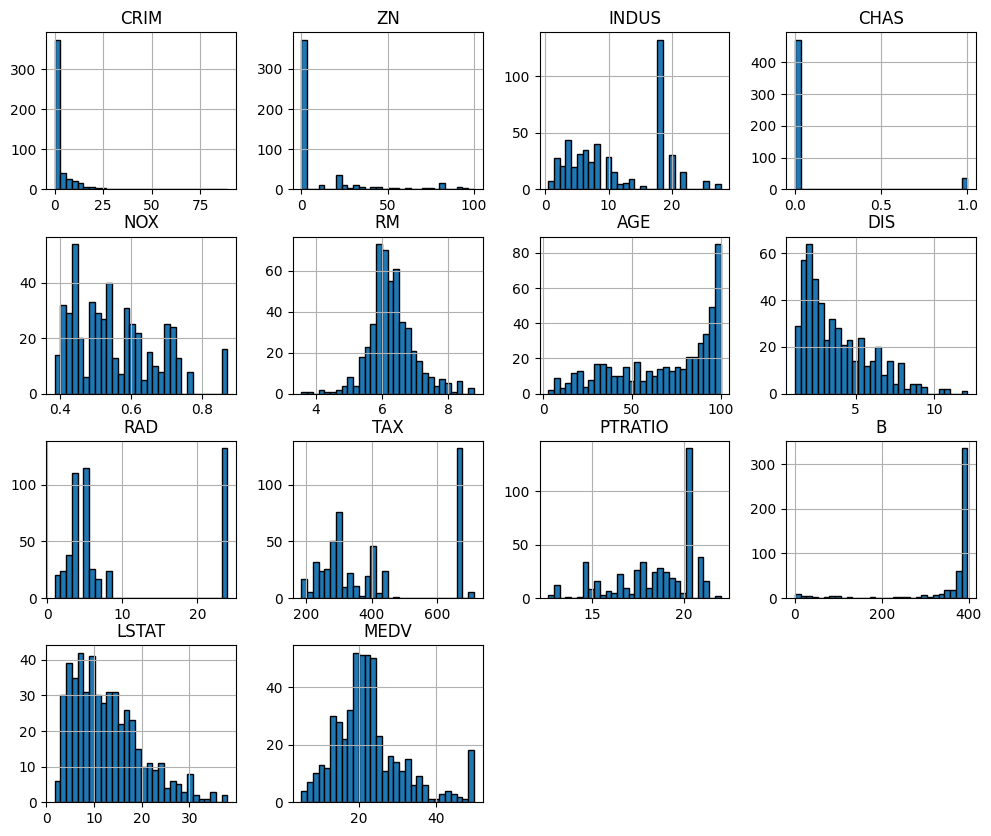

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Histograma para visualizar a distribuição das variáveis
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.show()



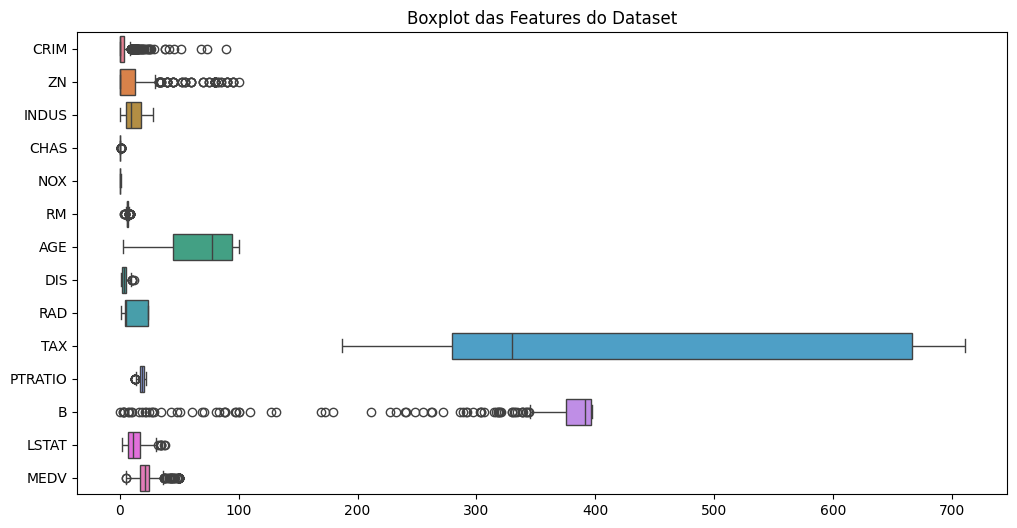

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Boxplot das Features do Dataset")
plt.show()


**Tarefa:**  
- Observe a distribuição das variáveis. Alguma delas está muito enviesada?  
- Há valores extremos que podem indicar outliers?  






---

### **Analisando os gráficos**
Os histogramas mostram como os dados estão distribuídos. Algumas observações importantes:

- **CRIM (Taxa de criminalidade)**: Fortemente enviesada à direita (muitos valores pequenos, poucos valores extremamente altos).
- **ZN (Zonas residenciais de grandes lotes)**: A maioria dos valores está próxima de zero, com poucos valores elevados.
- **AGE (Proporção de imóveis antigos)**: Viés à direita, indicando que muitas casas são antigas, com poucas exceções mais novas.
- **DIS (Distância de centros de emprego)**: Também mostra viés à direita, indicando que a maioria das casas está próxima do centro.
- **TAX (Taxa de imposto sobre propriedades)**: Possui picos em determinados valores, sugerindo categorias distintas.
- **LSTAT (Proporção de baixa renda na população)**: Viés à direita, com muitas casas em regiões de baixa renda e poucas em áreas de alta renda.
- **MEDV (Preço das casas - target)**: Distribuição ligeiramente assimétrica à esquerda, com muitos valores próximos de 20-25 e um limite superior em 50.


O segundo gráfico (boxplot) revela a presença de diversos **outliers**. Algumas colunas chamam a atenção:

- **CRIM, ZN, INDUS, TAX, B, LSTAT**: Possuem vários valores considerados extremos (pontos fora do limite superior da caixa).
- **TAX**: Tem uma dispersão enorme, o que pode impactar os modelos de regressão.
- **RAD e B**: Apresentam valores extremos que podem exigir normalização ou transformação logarítmica.

Variáveis como **CRIM, ZN, TAX, LSTAT e B** são fortemente enviesadas e podem precisar de **transformações** (como log ou normalização).  A presença de **outliers** pode distorcer os modelos de regressão.

## **Passo 4: Identificação de Outliers**
Valores extremos podem afetar negativamente os modelos de regressão. Vamos verificar quais variáveis contêm possíveis outliers.  


In [ ]:

# Definir o limite de outliers com base no IQR (Intervalo Interquartil)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Definir limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar quantos valores estão fora desses limites
outliers = ((df < limite_inferior) | (df > limite_superior)).sum()
outliers



,0
CRIM,66
ZN,68
INDUS,0
CHAS,35
NOX,0
RM,30
AGE,0
DIS,5
RAD,0
TAX,0


**Tarefa:**  
- Quais variáveis possuem maior número de outliers?  
- O que fazer com esses valores? Removê-los ou transformá-los?  

---

Se os outliers fazem parte da distribuição natural dos dados e não são erros, podemos aplicar **transformações matemáticas** para reduzir o impacto deles nos modelos.

#### **Transformações possíveis**:
- **Logaritmo (log)**: Para variáveis altamente enviesadas positivamente (exemplo: CRIM, ZN, TAX, LSTAT, B).
- **Raiz quadrada**: Alternativa ao log para dados com valores zero.
- **Padronização (Z-score)**: Subtrai a média e divide pelo desvio padrão (para normalizar a escala das variáveis).
- **Normalização (Min-Max Scaling)**: Escala os valores para um intervalo fixo (0 a 1).


### **Quando Remover Outliers**
Se os outliers forem **erros de medição ou valores extremamente discrepantes**, podemos removê-los. Para isso, usamos a **regra do intervalo interquartil (IQR)** ou o **Z-score**.

#### **Critérios para remoção**:
- Valores fora de **1.5x o intervalo interquartil (IQR)**.
- Valores com **Z-score maior que 3** (muito distantes da média).



### **Quando Manter os Outliers**
Se os valores extremos carregam informações importantes (exemplo: preços de casas de luxo), podemos **manter os outliers** e apenas ajustar os modelos para serem mais robustos a eles.

**Modelos menos sensíveis a outliers:**
- **Regressão Ridge/Lasso**: Reduz o impacto de variáveis influenciadas por outliers.
- **Modelos baseados em árvores (Random Forest, XGBoost)**: São menos sensíveis a valores extremos.

---




## **Passo 5: Análise para indentificar quais as colunas mais relevantes**
Agora, vamos verificar quais variáveis têm maior relação com o preço das casas.  





## Matriz de Correlação

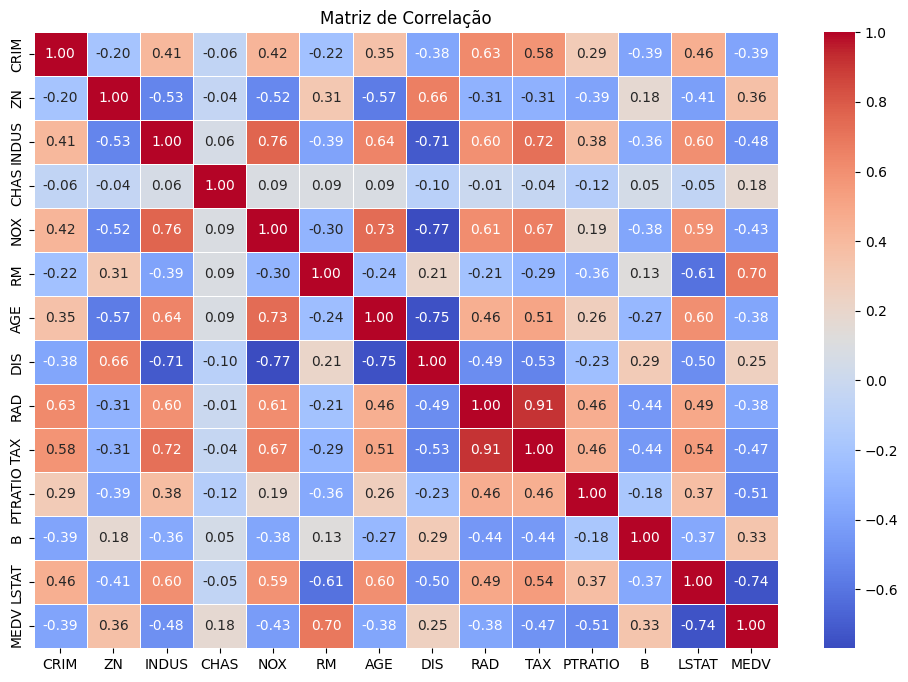

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df.corr()

# Exibir a matriz de correlação com um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

**Tarefa:**  
- Quais variáveis têm alta correlação com o preço das casas?  
- Alguma variável parece redundante (alta correlação com outra)?  
- Com base nessa análise, quais colunas podem ser mais importantes para os modelos de regressão?  



## Utilizando coeficiente de Lasso


,Feature,Lasso Importance
12,LSTAT,3.610072
5,RM,3.149505
7,DIS,3.033683
8,RAD,2.127566
10,PTRATIO,2.025009
4,NOX,1.978859
9,TAX,1.643649
11,B,1.121376
0,CRIM,0.983042
3,CHAS,0.719674


<ipython-input-40-bb80a0793d91>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lasso_feature_importance["Feature"], y=lasso_feature_importance["Lasso Importance"], palette="magma")


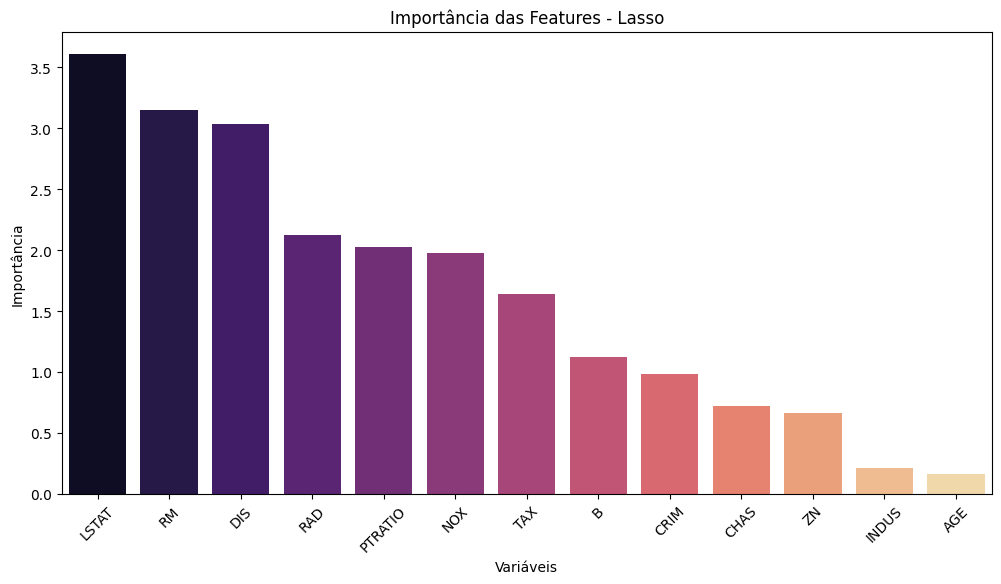

In [ ]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Separar variáveis independentes (X) e dependente (y)
X = df.drop(columns=["MEDV"])  # MEDV é o preço da casa (target)
y = df["MEDV"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados para o Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo Lasso com Cross-Validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Coeficientes do modelo Lasso
lasso_importance = np.abs(lasso.coef_)

# Criar DataFrame com os resultados
lasso_feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Lasso Importance": lasso_importance
}).sort_values(by="Lasso Importance", ascending=False)

# Exibir a tabela
display(lasso_feature_importance)

# Plotar a importância das variáveis pelo Lasso
plt.figure(figsize=(12, 6))
sns.barplot(x=lasso_feature_importance["Feature"], y=lasso_feature_importance["Lasso Importance"], palette="magma")
plt.xticks(rotation=45)
plt.title("Importância das Features - Lasso")
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()


### **Tarefa:**


*   Quais variáveis receberam coeficientes mais altos no modelo
*   Algumas features tiveram coeficiente zero? Se sim, elas podem ser removidas do modelo?



## Utilizando Random forest

,Feature,Random Forest Importance
5,RM,0.503845
12,LSTAT,0.309509
7,DIS,0.060549
0,CRIM,0.038062
10,PTRATIO,0.016313
9,TAX,0.015661
4,NOX,0.015544
6,AGE,0.013840
11,B,0.012154
2,INDUS,0.007953


<ipython-input-41-ddf9fd2ac992>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_feature_importance["Feature"], y=rf_feature_importance["Random Forest Importance"], palette="viridis")


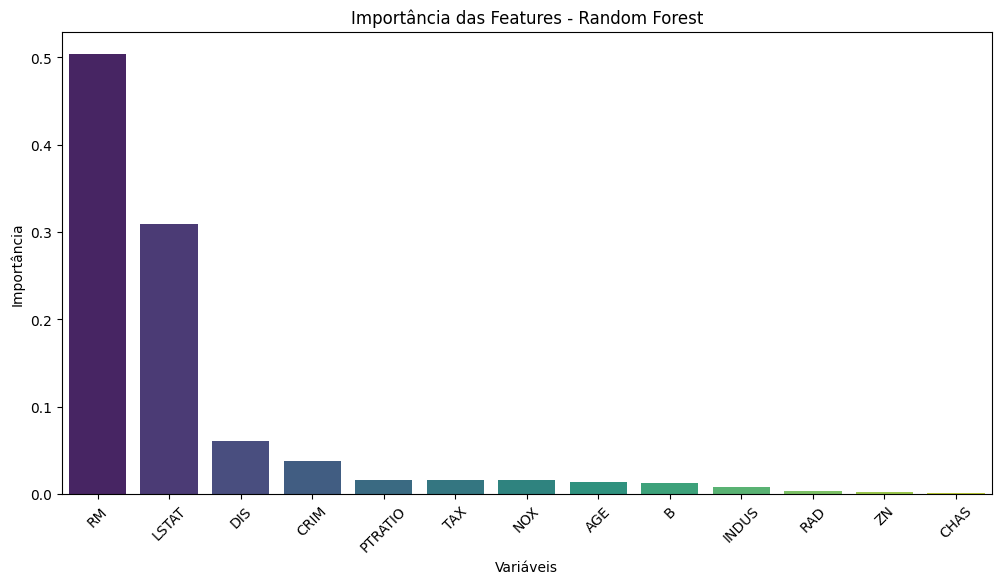

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Importância das features no Random Forest
rf_importance = rf.feature_importances_

# Criar DataFrame com os resultados
rf_feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Random Forest Importance": rf_importance
}).sort_values(by="Random Forest Importance", ascending=False)

# Exibir a tabela
display(rf_feature_importance)

# Plotar a importância das variáveis pelo Random Forest
plt.figure(figsize=(12, 6))
sns.barplot(x=rf_feature_importance["Feature"], y=rf_feature_importance["Random Forest Importance"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Importância das Features - Random Forest")
plt.xlabel("Variáveis")
plt.ylabel("Importância")
plt.show()


### **Tarefa:**


*   Quais variáveis foram mais importantes para a predição do preço das casas?
*   Quais variáveis tiveram pouca ou nenhuma importância? Elas podem ser removidas?
*   A ordem das features mais importantes faz sentido em um contexto imobiliário?





### **Comparação Geral das Features**
| **Variável**                           | **Correlação com MEDV** | **Importância no Lasso** | **Importância no Random Forest** |
|----------------------------------------|--------------------------|--------------------------|----------------------------------|
| **LSTAT (% baixa renda)**              | +0.74 (forte)            | **Mais importante**      | **Mais importante**            |
| **RM (Nº de Quartos)**                 | +0.70 (moderada)         | **Mais importante**      | **Mais importante**            |
| **DIS (Distância do centro)**          | +0.25 (muito fraca)      | **Mais importante**      | Moderada                        |
| **PTRATIO (Taxa aluno/professor)**     | +0.51 (moderada)         | Importante               | Baixa                            |
| **RAD (Acessibilidade a rodovias)**    | +0.38 (fraca)            | Importante               | Baixa                            |
| **TAX (Impostos)**                     | +0.47 (moderada)         | Moderada                 | Baixa                            |
| **CRIM (Taxa de criminalidade)**       | +0.39 (moderada)         | Baixa                    | Moderada                         |
| **ZN (Zonas residenciais)**            | +0.36 (fraca)            | Quase irrelevante        | Quase irrelevante               |
| **CHAS (Margem do rio)**               | +0.18 (fraca)            | Quase irrelevante        | Quase irrelevante               |
| **NOX (Concentração de poluentes)**    | +0.43 (moderada)         | Moderada                 | Baixa                            |
| **AGE (Proporção de imóveis antigos)** | +0.38 (moderada)         | Baixa                    | Baixa                            |
| **INDUS (Índice de áreas comerciais)** | +0.48 (moderada)         | Moderada                 | Baixa                            |
| **B (Proporção de população negra)**   | +0.33 (fraca)            | Baixa                    | Baixa                            |


#### **Variáveis mais importantes nos três métodos**
- **LSTAT (% baixa renda)**: Aparece como a **mais importante** em todos os métodos.
- **RM (Número médio de quartos)**: Também é **altamente relevante**, tanto no Lasso quanto no Random Forest.
- **DIS (Distância do centro)**: Embora tenha correlação fraca com o preço, o Lasso considera essa variável como **importante**, enquanto o Random Forest atribui **importância moderada**.

#### **Variáveis moderadamente importantes**
- **PTRATIO (Taxa aluno/professor)** e **TAX (Impostos)**: Têm correlação **moderada** com MEDV, e o Lasso as considera **importantes**, mas o Random Forest indica que seu impacto é **baixo**.
- **RAD (Acessibilidade a rodovias)**: Embora tenha correlação **fraca**, o Lasso atribui uma **importância razoável**, enquanto o Random Forest praticamente a ignora.
- **CRIM (Taxa de criminalidade)**: A correlação com o preço das casas é **moderada**, e o Random Forest a considera mais relevante do que o Lasso.

#### **Variáveis menos importantes (Podem ser descartadas)**
- **ZN (Zonas residenciais)** e **CHAS (Margem do rio)**: Ambas apresentam **baixa correlação** com MEDV e foram classificadas como **quase irrelevantes** nos dois métodos.
- **NOX (Concentração de poluentes), AGE (Proporção de imóveis antigos) e INDUS (Índice de áreas comerciais)**: Têm correlação **moderada**, mas foram consideradas **pouco importantes** tanto pelo Lasso quanto pelo Random Forest.
- **B (Proporção de população negra)**: Tem **baixa correlação** e foi considerada **irrelevante** pelos dois modelos.

---

### **O que fazer com esses resultados?**
Com base nessa análise, podemos tomar algumas decisões:

 **Manter como principais variáveis no modelo**:  
- **LSTAT (Baixa renda) e RM (Número de Quartos)** são as features mais fortes e devem ser **mantidas** no modelo final.  
- **DIS (Distância do centro)** pode ser mantida, mas precisa de mais testes para confirmar seu impacto real.

**Testar impacto das variáveis moderadas**:  
- **PTRATIO, TAX, CRIM e RAD** podem ser incluídas no modelo, mas talvez precisem de **normalização** ou ajustes.

**Remover variáveis menos relevantes**:  
- **ZN, CHAS, NOX, AGE, INDUS e B** podem ser **removidas**, pois não agregam valor significativo à previsão.



## **Atividade 2 - Pré-processamento e Feature Engineering**

Nesta etapa, realizaremos o pré-processamento dos dados e a seleção das variáveis mais relevantes para melhorar a performance dos modelos de regressão.  
As ações incluem:
- **Tratamento de valores nulos**
- **Identificação e remoção/tratamento de outliers**
- **Seleção das colunas mais relevantes**
- **Transformações nas features (padronização, normalização MinMax e normalização logarítmica)**

---

### **Tratamento de Valores Nulos**
Antes de realizar qualquer modificação, verificamos se há valores ausentes no dataset.



In [ ]:

# Verificar valores nulos
missing_values = df.isnull().sum()
print("Valores nulos por coluna:\n", missing_values)




Valores nulos por coluna:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


**Tarefa:**
- Existem colunas com valores nulos? Se sim, como podemos tratá-los?




### **Passo 2: Seleção das Features Mais Relevantes**
Com base na análise anterior, escolhemos as variáveis mais relevantes para a regressão.





In [ ]:

# Manter apenas as colunas mais importantes
selected_features = ["LSTAT", "RM", "DIS", "PTRATIO", "TAX", "CRIM"]
df_selected = df[selected_features + ["MEDV"]]  # Mantendo a variável alvo

# Exibir estatísticas das features selecionadas
df_selected.describe()


,LSTAT,RM,DIS,PTRATIO,TAX,CRIM,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,12.653063,6.284634,3.795043,18.455534,408.237154,3.613524,22.532806
std,7.141062,0.702617,2.105710,2.164946,168.537116,8.601545,9.197104
min,1.730000,3.561000,1.129600,12.600000,187.000000,0.006320,5.000000
25%,6.950000,5.885500,2.100175,17.400000,279.000000,0.082045,17.025000
50%,11.360000,6.208500,3.207450,19.050000,330.000000,0.256510,21.200000
75%,16.955000,6.623500,5.188425,20.200000,666.000000,3.677083,25.000000
max,37.970000,8.780000,12.126500,22.000000,711.000000,88.976200,50.000000


### **Passo 3: Transformação das Features**
Agora aplicamos três técnicas de transformação para comparação:
- **Padronização (StandardScaler)**
- **Normalização MinMax (0 a 1)**
- **Normalização Logarítmica (log1p)**



**Tarefa:**
- Como os valores mudaram após as transformações?
- Qual método parece mais adequado para os modelos que serão testados?


In [ ]:

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

# Criar escaladores
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Aplicar transformações
df_selected_standardized = pd.DataFrame(scaler_standard.fit_transform(df_selected), columns=df_selected.columns)
df_selected_normalized = pd.DataFrame(scaler_minmax.fit_transform(df_selected), columns=df_selected.columns)
df_selected_log = df_selected.apply(lambda x: np.log1p(x) if np.issubdtype(x.dtype, np.number) else x)


In [ ]:
df_selected_standardized.describe()

,LSTAT,RM,DIS,PTRATIO,TAX,CRIM,MEDV
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02
mean,-3.089316e-16,-1.088282e-16,-8.425408e-17,-4.212704e-16,0.000000,-1.123388e-16,-5.195668e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00
min,-1.531127e+00,-3.880249e+00,-1.267069e+00,-2.707379e+00,-1.313990,-4.197819e-01,-1.908226e+00
25%,-7.994200e-01,-5.686303e-01,-8.056878e-01,-4.880391e-01,-0.767576,-4.109696e-01,-5.994557e-01
50%,-1.812536e-01,-1.084655e-01,-2.793234e-01,2.748590e-01,-0.464673,-3.906665e-01,-1.450593e-01
75%,6.030188e-01,4.827678e-01,6.623709e-01,8.065758e-01,1.530926,7.396560e-03,2.685231e-01
max,3.548771e+00,3.555044e+00,3.960518e+00,1.638828e+00,1.798194,9.933931e+00,2.989460e+00


In [ ]:
df_selected_normalized.describe()

,LSTAT,RM,DIS,PTRATIO,TAX,CRIM,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.301409,0.521869,0.242381,0.622929,0.422208,0.040544,0.389618
std,0.197049,0.134627,0.191482,0.230313,0.321636,0.096679,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.144040,0.445392,0.088259,0.510638,0.175573,0.000851,0.267222
50%,0.265728,0.507281,0.188949,0.686170,0.272901,0.002812,0.360000
75%,0.420116,0.586798,0.369088,0.808511,0.914122,0.041258,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_selected_log.describe()

,LSTAT,RM,DIS,PTRATIO,TAX,CRIM,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,2.475610,1.981139,1.479648,2.961462,5.934259,0.813418,3.085437
std,0.539033,0.096500,0.413390,0.117926,0.395337,1.022731,0.386966
min,1.004302,1.517542,0.755934,2.610070,5.236442,0.006300,1.791759
25%,2.073162,1.929418,1.131459,2.912351,5.634790,0.078853,2.891757
50%,2.514464,1.975261,1.436855,2.998226,5.802118,0.228336,3.100092
75%,2.887869,2.031236,1.822659,3.054001,6.502790,1.542674,3.258097
max,3.662792,2.280339,2.574633,3.135494,6.568078,4.499545,3.931826


## **Atividade 3 - Aplicação de Modelos de Regressão**

Nesta etapa, aplicaremos **múltiplas técnicas de regressão** para prever o preço das casas (**MEDV**) e comparar o desempenho dos modelos.

Serão avaliados os seguintes modelos:
- **Regressão Linear Simples e Múltipla**
- **Ridge e Lasso (Regularização)**
- **Árvores de Decisão e Random Forest**
- **XGBoost**

Para avaliar o desempenho, utilizaremos as métricas:
- **RMSE (Root Mean Square Error)** - Erro médio quadrático
- **R² (Coeficiente de Determinação)** - Qualidade do ajuste do modelo

---


### **Passo 1: Divisão dos Dados**
Antes de treinar os modelos, precisamos dividir os dados em **treino (80%)** e **teste (20%)**.


In [ ]:
# Dados SEM Normalização
X = df_selected[selected_features]
y = df_selected["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(" Dados SEM Normalização:")
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras\n")

# Dados com Padronização (Z-score)
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_standard, y, test_size=0.2, random_state=42)

print("Dados com Padronização (Z-score):")
print(f"Tamanho do conjunto de treino: {X_train_std.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test_std.shape[0]} amostras\n")

# Dados com Normalização Min-Max
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X)
X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax = train_test_split(X_minmax, y, test_size=0.2, random_state=42)

print("Dados com Normalização Min-Max:")
print(f"Tamanho do conjunto de treino: {X_train_minmax.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test_minmax.shape[0]} amostras\n")

# Dados com Normalização Logarítmica
X_log = np.log1p(X)  # Aplicar log(1 + x) para evitar log(0)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y, test_size=0.2, random_state=42)

print("Dados com Normalização Logarítmica:")
print(f"Tamanho do conjunto de treino: {X_train_log.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test_log.shape[0]} amostras\n")



 Dados SEM Normalização:
Tamanho do conjunto de treino: 404 amostras
Tamanho do conjunto de teste: 102 amostras

Dados com Padronização (Z-score):
Tamanho do conjunto de treino: 404 amostras
Tamanho do conjunto de teste: 102 amostras

Dados com Normalização Min-Max:
Tamanho do conjunto de treino: 404 amostras
Tamanho do conjunto de teste: 102 amostras

Dados com Normalização Logarítmica:
Tamanho do conjunto de treino: 404 amostras
Tamanho do conjunto de teste: 102 amostras



### **Passo 2: Aplicação dos Modelos de Regressão**
Agora treinaremos cada modelo e avaliaremos o desempenho.


#### **Modelo 1: Regressão Linear**


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dicionário para armazenar os resultados
resultados_lr = {}

# Regressão Linear - Dados SEM Normalização
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

resultados_lr["Sem Normalização"] = (rmse_lr, r2_lr)

# Regressão Linear - Dados com Padronização (Z-score)
lr_std = LinearRegression()
lr_std.fit(X_train_std, y_train_std)
y_pred_lr_std = lr_std.predict(X_test_std)

rmse_lr_std = np.sqrt(mean_squared_error(y_test_std, y_pred_lr_std))
r2_lr_std = r2_score(y_test_std, y_pred_lr_std)

resultados_lr["Padronização (Z-score)"] = (rmse_lr_std, r2_lr_std)

# regressão Linear - Dados com Normalização Min-Max
lr_minmax = LinearRegression()
lr_minmax.fit(X_train_minmax, y_train_minmax)
y_pred_lr_minmax = lr_minmax.predict(X_test_minmax)

rmse_lr_minmax = np.sqrt(mean_squared_error(y_test_minmax, y_pred_lr_minmax))
r2_lr_minmax = r2_score(y_test_minmax, y_pred_lr_minmax)

resultados_lr["Normalização Min-Max"] = (rmse_lr_minmax, r2_lr_minmax)

# Regressão Linear - Dados com Normalização Logarítmica
lr_log = LinearRegression()
lr_log.fit(X_train_log, y_train_log)
y_pred_lr_log = lr_log.predict(X_test_log)

rmse_lr_log = np.sqrt(mean_squared_error(y_test_log, y_pred_lr_log))
r2_lr_log = r2_score(y_test_log, y_pred_lr_log)

resultados_lr["Normalização Logarítmica"] = (rmse_lr_log, r2_lr_log)

df_resultados_lr = pd.DataFrame.from_dict(
    resultados_lr, orient="index", columns=["RMSE", "R²"]
).sort_values(by="RMSE")

# Exibir os resultados organizados
print("\n Comparação da Regressão Linear com Diferentes Normalizações:")
print(df_resultados_lr)



 Comparação da Regressão Linear com Diferentes Normalizações:
                              RMSE        R²
Normalização Logarítmica  4.699999  0.698775
Sem Normalização          5.272110  0.620978
Normalização Min-Max      5.272110  0.620978
Padronização (Z-score)    5.272110  0.620978



#### **Modelo 2: Ridge Regression (Regularização L2)**

In [ ]:
from sklearn.linear_model import Ridge


# Dicionário para armazenar os resultados
resultados_ridge = {}

# Regressão Ridge - Dados SEM Normalização
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

resultados_ridge["Sem Normalização"] = (rmse_ridge, r2_ridge)

#  Regressão Ridge - Dados com Padronização (Z-score)
ridge_std = Ridge(alpha=1.0)
ridge_std.fit(X_train_std, y_train_std)
y_pred_ridge_std = ridge_std.predict(X_test_std)

rmse_ridge_std = np.sqrt(mean_squared_error(y_test_std, y_pred_ridge_std))
r2_ridge_std = r2_score(y_test_std, y_pred_ridge_std)

resultados_ridge["Padronização (Z-score)"] = (rmse_ridge_std, r2_ridge_std)

#  Regressão Ridge - Dados com Normalização Min-Max
ridge_minmax = Ridge(alpha=1.0)
ridge_minmax.fit(X_train_minmax, y_train_minmax)
y_pred_ridge_minmax = ridge_minmax.predict(X_test_minmax)

rmse_ridge_minmax = np.sqrt(mean_squared_error(y_test_minmax, y_pred_ridge_minmax))
r2_ridge_minmax = r2_score(y_test_minmax, y_pred_ridge_minmax)

resultados_ridge["Normalização Min-Max"] = (rmse_ridge_minmax, r2_ridge_minmax)

# Regressão Ridge - Dados com Normalização Logarítmica
ridge_log = Ridge(alpha=1.0)
ridge_log.fit(X_train_log, y_train_log)
y_pred_ridge_log = ridge_log.predict(X_test_log)

rmse_ridge_log = np.sqrt(mean_squared_error(y_test_log, y_pred_ridge_log))
r2_ridge_log = r2_score(y_test_log, y_pred_ridge_log)

resultados_ridge["Normalização Logarítmica"] = (rmse_ridge_log, r2_ridge_log)

# Criar um DataFrame para visualizar os resultados
df_resultados_ridge = pd.DataFrame.from_dict(
    resultados_ridge, orient="index", columns=["RMSE", "R²"]
).sort_values(by="RMSE")

# Exibir os resultados organizados
print("\nComparação da Regressão Ridge com Diferentes Normalizações:")
print(df_resultados_ridge)



Comparação da Regressão Ridge com Diferentes Normalizações:
                              RMSE        R²
Normalização Logarítmica  4.629997  0.707681
Normalização Min-Max      5.159037  0.637061
Sem Normalização          5.267843  0.621591
Padronização (Z-score)    5.269769  0.621314



#### **Modelo 3: Lasso Regression (Regularização L1)**

In [ ]:
from sklearn.linear_model import Lasso

# Dicionário para armazenar os resultados
resultados_lasso = {}

# Regressão Lasso - Dados SEM Normalização
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

resultados_lasso["Sem Normalização"] = (rmse_lasso, r2_lasso)

#  Regressão Lasso - Dados com Padronização (Z-score)
lasso_std = Lasso(alpha=0.1)
lasso_std.fit(X_train_std, y_train_std)
y_pred_lasso_std = lasso_std.predict(X_test_std)

rmse_lasso_std = np.sqrt(mean_squared_error(y_test_std, y_pred_lasso_std))
r2_lasso_std = r2_score(y_test_std, y_pred_lasso_std)

resultados_lasso["Padronização (Z-score)"] = (rmse_lasso_std, r2_lasso_std)

#  Regressão Lasso - Dados com Normalização Min-Max
lasso_minmax = Lasso(alpha=0.1)
lasso_minmax.fit(X_train_minmax, y_train_minmax)
y_pred_lasso_minmax = lasso_minmax.predict(X_test_minmax)

rmse_lasso_minmax = np.sqrt(mean_squared_error(y_test_minmax, y_pred_lasso_minmax))
r2_lasso_minmax = r2_score(y_test_minmax, y_pred_lasso_minmax)

resultados_lasso["Normalização Min-Max"] = (rmse_lasso_minmax, r2_lasso_minmax)

# Regressão Lasso - Dados com Normalização Logarítmica
lasso_log = Lasso(alpha=0.1)
lasso_log.fit(X_train_log, y_train_log)
y_pred_lasso_log = lasso_log.predict(X_test_log)

rmse_lasso_log = np.sqrt(mean_squared_error(y_test_log, y_pred_lasso_log))
r2_lasso_log = r2_score(y_test_log, y_pred_lasso_log)

resultados_lasso["Normalização Logarítmica"] = (rmse_lasso_log, r2_lasso_log)

# Criar um DataFrame para visualizar os resultados
df_resultados_lasso = pd.DataFrame.from_dict(
    resultados_lasso, orient="index", columns=["RMSE", "R²"]
).sort_values(by="RMSE")

# Exibir os resultados organizados
print("\nComparação da Regressão Lasso com Diferentes Normalizações:")
print(df_resultados_lasso)



Comparação da Regressão Lasso com Diferentes Normalizações:
                              RMSE        R²
Normalização Logarítmica  4.658998  0.704007
Normalização Min-Max      5.093066  0.646284
Padronização (Z-score)    5.234725  0.626334
Sem Normalização          5.237360  0.625958


#### **Modelo 4: Árvore de Decisão**

In [ ]:
from sklearn.tree import DecisionTreeRegressor


# Dicionário para armazenar os resultados
resultados_dt = {}

#  Árvore de Decisão - Dados SEM Normalização
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

resultados_dt["Sem Normalização"] = (rmse_dt, r2_dt)

#  Árvore de Decisão - Dados com Padronização (Z-score)
dt_std = DecisionTreeRegressor(random_state=42)
dt_std.fit(X_train_std, y_train_std)
y_pred_dt_std = dt_std.predict(X_test_std)

rmse_dt_std = np.sqrt(mean_squared_error(y_test_std, y_pred_dt_std))
r2_dt_std = r2_score(y_test_std, y_pred_dt_std)

resultados_dt["Padronização (Z-score)"] = (rmse_dt_std, r2_dt_std)

#  Árvore de Decisão - Dados com Normalização Min-Max
dt_minmax = DecisionTreeRegressor(random_state=42)
dt_minmax.fit(X_train_minmax, y_train_minmax)
y_pred_dt_minmax = dt_minmax.predict(X_test_minmax)

rmse_dt_minmax = np.sqrt(mean_squared_error(y_test_minmax, y_pred_dt_minmax))
r2_dt_minmax = r2_score(y_test_minmax, y_pred_dt_minmax)

resultados_dt["Normalização Min-Max"] = (rmse_dt_minmax, r2_dt_minmax)

#  Árvore de Decisão - Dados com Normalização Logarítmica
dt_log = DecisionTreeRegressor(random_state=42)
dt_log.fit(X_train_log, y_train_log)
y_pred_dt_log = dt_log.predict(X_test_log)

rmse_dt_log = np.sqrt(mean_squared_error(y_test_log, y_pred_dt_log))
r2_dt_log = r2_score(y_test_log, y_pred_dt_log)

resultados_dt["Normalização Logarítmica"] = (rmse_dt_log, r2_dt_log)

# Criar um DataFrame para visualizar os resultados
df_resultados_dt = pd.DataFrame.from_dict(
    resultados_dt, orient="index", columns=["RMSE", "R²"]
).sort_values(by="RMSE")

# Exibir os resultados organizados
print("\nComparação da Árvore de Decisão com Diferentes Normalizações:")
print(df_resultados_dt)



Comparação da Árvore de Decisão com Diferentes Normalizações:
                              RMSE        R²
Sem Normalização          5.080489  0.648029
Padronização (Z-score)    5.080489  0.648029
Normalização Min-Max      5.080489  0.648029
Normalização Logarítmica  5.141717  0.639494


#### **Modelo 5: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Dicionário para armazenar os resultados
resultados_rf = {}

# Random Forest - Dados SEM Normalização
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

resultados_rf["Sem Normalização"] = (rmse_rf, r2_rf)

# Random Forest - Dados com Padronização (Z-score)
rf_std = RandomForestRegressor(n_estimators=100, random_state=42)
rf_std.fit(X_train_std, y_train_std)
y_pred_rf_std = rf_std.predict(X_test_std)

rmse_rf_std = np.sqrt(mean_squared_error(y_test_std, y_pred_rf_std))
r2_rf_std = r2_score(y_test_std, y_pred_rf_std)

resultados_rf["Padronização (Z-score)"] = (rmse_rf_std, r2_rf_std)

# Random Forest - Dados com Normalização Min-Max
rf_minmax = RandomForestRegressor(n_estimators=100, random_state=42)
rf_minmax.fit(X_train_minmax, y_train_minmax)
y_pred_rf_minmax = rf_minmax.predict(X_test_minmax)

rmse_rf_minmax = np.sqrt(mean_squared_error(y_test_minmax, y_pred_rf_minmax))
r2_rf_minmax = r2_score(y_test_minmax, y_pred_rf_minmax)

resultados_rf["Normalização Min-Max"] = (rmse_rf_minmax, r2_rf_minmax)

# Random Forest - Dados com Normalização Logarítmica
rf_log = RandomForestRegressor(n_estimators=100, random_state=42)
rf_log.fit(X_train_log, y_train_log)
y_pred_rf_log = rf_log.predict(X_test_log)

rmse_rf_log = np.sqrt(mean_squared_error(y_test_log, y_pred_rf_log))
r2_rf_log = r2_score(y_test_log, y_pred_rf_log)

resultados_rf["Normalização Logarítmica"] = (rmse_rf_log, r2_rf_log)

# Criar um DataFrame para visualizar os resultados
df_resultados_rf = pd.DataFrame.from_dict(
    resultados_rf, orient="index", columns=["RMSE", "R²"]
).sort_values(by="RMSE")

# Exibir os resultados organizados
print("\nComparação do Random Forest com Diferentes Normalizações:")
print(df_resultados_rf)



Comparação do Random Forest com Diferentes Normalizações:
                              RMSE        R²
Normalização Min-Max      3.202718  0.860127
Sem Normalização          3.202959  0.860106
Padronização (Z-score)    3.207084  0.859746
Normalização Logarítmica  3.209411  0.859542


#### **Modelo 6: XGBoost**

In [ ]:
from xgboost import XGBRegressor

# Dicionário para armazenar os resultados
resultados_xgb = {}

# XGBoost - Dados SEM Normalização
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

resultados_xgb["Sem Normalização"] = (rmse_xgb, r2_xgb)

# XGBoost - Dados com Padronização (Z-score)
xgb_std = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_std.fit(X_train_std, y_train_std)
y_pred_xgb_std = xgb_std.predict(X_test_std)

rmse_xgb_std = np.sqrt(mean_squared_error(y_test_std, y_pred_xgb_std))
r2_xgb_std = r2_score(y_test_std, y_pred_xgb_std)

resultados_xgb["Padronização (Z-score)"] = (rmse_xgb_std, r2_xgb_std)

# XGBoost - Dados com Normalização Min-Max
xgb_minmax = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_minmax.fit(X_train_minmax, y_train_minmax)
y_pred_xgb_minmax = xgb_minmax.predict(X_test_minmax)

rmse_xgb_minmax = np.sqrt(mean_squared_error(y_test_minmax, y_pred_xgb_minmax))
r2_xgb_minmax = r2_score(y_test_minmax, y_pred_xgb_minmax)

resultados_xgb["Normalização Min-Max"] = (rmse_xgb_minmax, r2_xgb_minmax)

# XGBoost - Dados com Normalização Logarítmica
xgb_log = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_log.fit(X_train_log, y_train_log)
y_pred_xgb_log = xgb_log.predict(X_test_log)

rmse_xgb_log = np.sqrt(mean_squared_error(y_test_log, y_pred_xgb_log))
r2_xgb_log = r2_score(y_test_log, y_pred_xgb_log)

resultados_xgb["Normalização Logarítmica"] = (rmse_xgb_log, r2_xgb_log)

# Criar um DataFrame para visualizar os resultados
df_resultados_xgb = pd.DataFrame.from_dict(
    resultados_xgb, orient="index", columns=["RMSE", "R²"]
).sort_values(by="RMSE")

# Exibir os resultados organizados
print("\nComparação do XGBoost com Diferentes Normalizações:")
print(df_resultados_xgb)



Comparação do XGBoost com Diferentes Normalizações:
                              RMSE        R²
Sem Normalização          3.236879  0.857127
Padronização (Z-score)    3.236879  0.857127
Normalização Min-Max      3.236879  0.857127
Normalização Logarítmica  3.236879  0.857127


### **É possível realizar comparação dos Modelos mais otimizada sem tanto código ?**

In [ ]:
# Lista de modelos a serem testados
modelos = {
    "Regressão Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Árvore de Decisão": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Dicionário com os diferentes conjuntos de dados
datasets = {
    "Sem Normalização": (X_train, X_test, y_train, y_test),
    "Padronização (Z-score)": (X_train_std, X_test_std, y_train_std, y_test_std),
    "Normalização Min-Max": (X_train_minmax, X_test_minmax, y_train_minmax, y_test_minmax),
    "Normalização Logarítmica": (X_train_log, X_test_log, y_train_log, y_test_log)
}

# Lista para armazenar os resultados
resultados = []

# Loop para treinar cada modelo com cada tipo de normalização
for nome_modelo, modelo in modelos.items():
    for nome_normalizacao, (X_train_set, X_test_set, y_train_set, y_test_set) in datasets.items():
        # Treinar o modelo
        modelo.fit(X_train_set, y_train_set)
        # Fazer previsões
        y_pred = modelo.predict(X_test_set)
        # Calcular métricas
        rmse = np.sqrt(mean_squared_error(y_test_set, y_pred))
        r2 = r2_score(y_test_set, y_pred)
        # Salvar resultados na lista
        resultados.append([nome_modelo, nome_normalizacao, rmse, r2])

# Criar DataFrame com os resultados
df_resultados = pd.DataFrame(resultados, columns=["Modelo", "Normalização", "RMSE", "R²"])
df_resultados = df_resultados.sort_values(by="RMSE")

# Exibir os resultados organizados
print("\nComparação dos Modelos com Diferentes Normalizações:")
df_resultados



Comparação dos Modelos com Diferentes Normalizações:


,Modelo,Normalização,RMSE,R²
18,Random Forest,Normalização Min-Max,3.202718,0.860127
16,Random Forest,Sem Normalização,3.202959,0.860106
17,Random Forest,Padronização (Z-score),3.207084,0.859746
19,Random Forest,Normalização Logarítmica,3.209411,0.859542
23,XGBoost,Normalização Logarítmica,3.236879,0.857127
21,XGBoost,Padronização (Z-score),3.236879,0.857127
20,XGBoost,Sem Normalização,3.236879,0.857127
22,XGBoost,Normalização Min-Max,3.236879,0.857127
7,Ridge,Normalização Logarítmica,4.629997,0.707681
11,Lasso,Normalização Logarítmica,4.658998,0.704007



**Tarefa:**
1. **Qual modelo apresentou o menor RMSE?**
2. **O modelo com maior R² é o mesmo que obteve o menor erro?**
3. **O Random Forest e o XGBoost tiveram melhor desempenho do que os modelos lineares?**
4. **O modelo mais simples (Regressão Linear) tem um desempenho muito pior que os modelos mais complexos?**
5. **É Possível mais testes para melhorar o modelo de melhor resultado?**

---



### **GridSearch no modelo random forest e visualização dos dados.**

In [ ]:
from sklearn.model_selection import GridSearchCV


# Definir os hiperparâmetros que serão testados
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Criar o modelo Random Forest
rf = RandomForestRegressor(random_state=42)

# Criar o GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,  # Validação cruzada com 5 folds
    n_jobs=-1,  # Usar todos os núcleos disponíveis para processamento paralelo
    verbose=2  # Mostrar o progresso do GridSearch
)

# Aplicar GridSearchCV no conjunto SEM normalização (pode ser alterado para outros conjuntos)
grid_search.fit(X_train_minmax, y_train_minmax)

# Melhor conjunto de hiperparâmetros encontrados
print("\nMelhores Hiperparâmetros:", grid_search.best_params_)

# Melhor modelo Random Forest
best_rf = grid_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred_best_rf = best_rf.predict(X_test_minmax)

# Avaliar desempenho do modelo otimizado
rmse_best_rf = np.sqrt(mean_squared_error(y_test_minmax, y_pred_best_rf))
r2_best_rf = r2_score(y_test_minmax, y_pred_best_rf)

print("Melhor parametrização: ",grid_search.best_estimator_)
print(f"\nMelhor Random Forest - RMSE: {rmse_best_rf:.2f} | R²: {r2_best_rf:.2f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Melhores Hiperparâmetros: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Melhor parametrização:  RandomForestRegressor(max_depth=10, min_samples_leaf=2, random_state=42)

Melhor Random Forest - RMSE: 3.22 | R²: 0.86


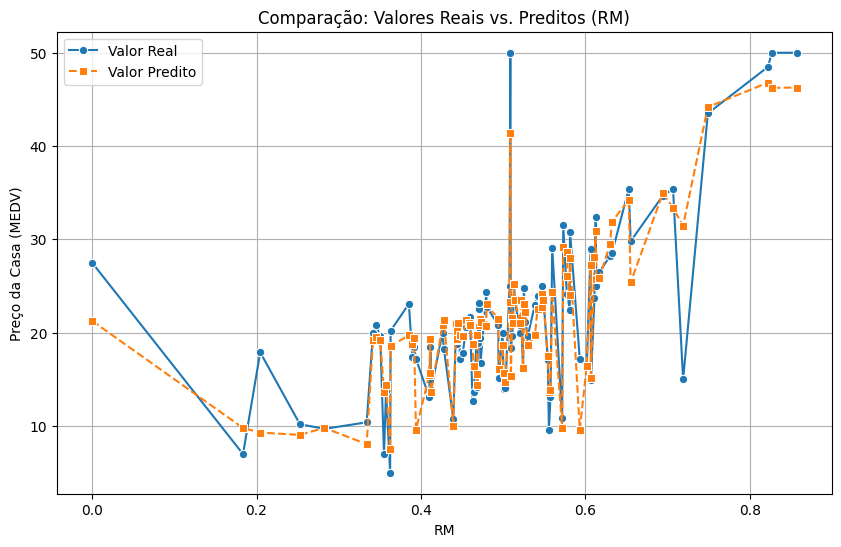

In [ ]:

# Selecionar a feature mais relevante (ex: RM ou LSTAT)
feature_relevante = "RM"  # Altere para "LSTAT" caso necessário

# Recuperar os índices da feature no array normalizado
feature_index = list(X.columns).index(feature_relevante)  # Pegando o índice correto

# Selecionar os valores reais e preditos do melhor modelo
y_real = y_test_minmax  # Ajustar para o conjunto correto de teste
y_pred = y_pred_rf_minmax  # Ajustar para o modelo desejado (Random Forest no exemplo)

# Criar DataFrame para visualização
df_visualizacao = pd.DataFrame({
    feature_relevante: X_test_minmax[:, feature_index],  # Acessar a feature pelo índice correto
    "Valor Real": y_real,
    "Valor Predito": y_pred
})

# Ordenar para melhor visualização
df_visualizacao = df_visualizacao.sort_values(by=feature_relevante)

# Criar gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_visualizacao[feature_relevante], y=df_visualizacao["Valor Real"], label="Valor Real", marker="o", linestyle="-")
sns.lineplot(x=df_visualizacao[feature_relevante], y=df_visualizacao["Valor Predito"], label="Valor Predito", marker="s", linestyle="--")

# Ajustar layout do gráfico
plt.xlabel(feature_relevante)
plt.ylabel("Preço da Casa (MEDV)")
plt.title(f"Comparação: Valores Reais vs. Preditos ({feature_relevante})")
plt.legend()
plt.grid(True)

# Exibir gráfico
plt.show()